In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('D:\MLProjects\Bankruptcy data\data.csv')

In [3]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


df.rename (columns = 
           {'Bankrupt?':'Bankrupt'}, inplace=True
          )

In [4]:
y = df.iloc[:,0]
X = df.iloc[:,1:]

In [5]:
from imblearn.over_sampling import SMOTE
sampling = SMOTE(sampling_strategy='minority')

In [6]:
X_sample, y_sample = sampling.fit_resample(X,y)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [8]:
X_ = pd.DataFrame(scaler.fit_transform(X_sample), columns=X_sample.columns)

# Feature Selection

In [9]:
#pip install feature-engine --quiet

In [10]:
from feature_engine.selection import DropConstantFeatures,DropCorrelatedFeatures,DropDuplicateFeatures

In [11]:
from sklearn.feature_selection import VarianceThreshold
constant_features = VarianceThreshold(threshold=0.0)
constant_features.fit(X_)

VarianceThreshold()

In [12]:
print('Features before removing Constant Features: ', X_.shape[1])

X_ = constant_features.transform(X_)

print('Features After dropping COnstant Features: ', X_.shape[1])

Features before removing Constant Features:  95
Features After dropping COnstant Features:  94


Dropping COnstant Features

In [13]:
quasi_constant = DropConstantFeatures(tol=0.98)
quasi_constant.fit(X_)

DropConstantFeatures(tol=0.98)

In [14]:
len(quasi_constant.features_to_drop_)

1

In [15]:
df = quasi_constant.transform(X_)
print('Features After Dropping Low Variance Features:', X_.shape[1])

Features After Dropping Low Variance Features: 94


Dropping Duplicated Features

In [16]:
#droppjng the duplicate features
drop_duplicates = DropDuplicateFeatures()
drop_duplicates.fit(X_)

DropDuplicateFeatures()

In [17]:
#this will give the identical features
drop_duplicates.duplicated_feature_sets_

[{'63', '76'}, {'65', '77'}]

In [18]:
drop_duplicates.features_to_drop_

{'76', '77'}

In [19]:
X_ = drop_duplicates.transform(X_)
print('Features After Dropping Duplicated Features:', X_.shape[1])

Features After Dropping Duplicated Features: 92


#Dropping Correlated Features

In [20]:
correlated = DropCorrelatedFeatures(variables=None, method='pearson', threshold=0.90)

In [21]:
# finding correlated features in dataframe
correlated.fit(X_)

DropCorrelatedFeatures(threshold=0.9)

In [22]:
correlated.correlated_feature_sets_

[{'0', '1', '2'},
 {'3', '4', '88'},
 {'5', '6', '9'},
 {'12', '60'},
 {'15', '16', '17'},
 {'18', '22', '42'},
 {'21', '41'},
 {'25', '26'},
 {'36', '37'},
 {'39', '65', '89', '90'},
 {'72', '74'}]

In [23]:
len(correlated.features_to_drop_)

18

In [24]:
X_ = correlated.transform(X_)

print('DataFrame After removing Correlated Features: ', X_.shape[1])

DataFrame After removing Correlated Features:  74


In [25]:
#df['Bankrupt?'].value_counts()

# Model Building

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_roc_curve, accuracy_score,roc_curve
X_train,X_test, y_train,y_test = train_test_split(X_,y_sample, test_size=0.25, shuffle=True, stratify=y_sample)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [28]:
catboost= CatBoostClassifier(),
gaussian= GaussianNB(),
xgboost= XGBClassifier(),
catboost= CatBoostClassifier(),
lgbm= LGBMClassifier()
logistic = LogisticRegression()

In [29]:
lgbm.fit(X_train,y_train)
y_pred = lgbm.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1650
           1       0.98      1.00      0.99      1650

    accuracy                           0.99      3300
   macro avg       0.99      0.99      0.99      3300
weighted avg       0.99      0.99      0.99      3300



In [30]:
logistic.fit(X_train,y_train)

C:\Users\Bhargav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
y_pred1 = logistic.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1650
           1       0.98      1.00      0.99      1650

    accuracy                           0.99      3300
   macro avg       0.99      0.99      0.99      3300
weighted avg       0.99      0.99      0.99      3300



# Roc Curve

In [32]:
#finding probabilites
#finding the probabilities
prob1 = logistic.predict_proba(X_test)
prob2 = lgbm.predict_proba(X_test)

In [33]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [35]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, prob1[:,1])
auc_score2 = roc_auc_score(y_test, prob2[:,1])

#this the auc score for the above models 
print(auc_score1, auc_score2)

0.9625926538108356 0.9993976124885217


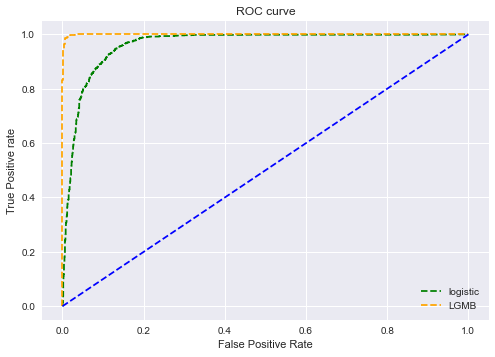

In [36]:
#plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='green', label='logistic')
plt.plot(fpr2, tpr2, linestyle='--',color='orange', label='LGMB')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
#plt.savefig('ROC',dpi=300)
plt.show()